# Applied Mathematics 115: Mathematical Modeling  
---
*2024 Spring / Full Term*

**Meeting Time:**  
Tuesday 10:30 AM - 11:45 AM  
Thursday 10:30 AM - 11:45 AM
<br>
<br>

**Instructors:**  
*Michael P. Brenner* (Pierce Hall 313) brenner@seas.harvard.edu  
Francesco Mottes fmottes@seas.harvard.edu  

**Teaching Fellows:**  
Henry Bae henrybae@college.harvard.edu  
Sarah Martinson sarahmartinson@g.harvard.edu  
Shruti Sharma ssharma1@g.harvard.edu  
Al Shodiev alshodiev@college.harvard.edu  
Alex Sullivan alexsullivan@college.harvard.edu  
Matt Tibbitts mtibbitts@college.harvard.edu  






# The SIR Model

The SIR model is a simple yet foundational model in epidemiology, used to understand the spread of diseases in a population. It divides the population into three categories:
1. **Susceptible (S):** Individuals who are susceptible to the disease.
2. **Infected (I):** Individuals who have the disease and can transmit it to susceptible individuals.
3. **Recovered (R):** Individuals who have recovered from the disease and are no longer susceptible.

The model is governed by a set of differential equations that describe how individuals move between these categories over time. It assumes a closed population (no births, deaths, or migration) and that the course of the disease is much shorter than the lifetime of an individual.


## Mathematical Formulation

The SIR model can be described by the following set of ordinary differential equations (ODEs):

$$
\begin{align*}
\frac{dS}{dt} &= -\beta \cdot I \cdot S, \\
\frac{dI}{dt} &= \beta \cdot I \cdot S - \gamma \cdot I, \\
\frac{dR}{dt} &= \gamma \cdot I,
\end{align*}
$$

where
- $\beta$ is the transmission rate, representing the probability of transmitting the disease between a susceptible and an infected individual per contact, per unit time.
- $\gamma$ is the recovery rate, representing the rate at which infected individuals recover and move into the recovered class.

These equations collectively describe how the disease spreads and eventually dies out in the population.

In the following sections, we will implement the SIR model in Python and simulate a basic scenario.


In [116]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from scipy.integrate import odeint

## Simulation of the SIR Model

We can simulate the SIR model using the `scipy` library in Python. We will use the `odeint` function from the `scipy.integrate` module to solve the system of ODEs.

In [117]:
# The SIR model differential equations.
def sir_model(y, t, beta, gamma):
    
    S, I, R = y

    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I

    return dSdt, dIdt, dRdt

In [118]:
# Mean transmission rate and 
beta = 0.0005

#Mean recovery rate (in 1/days).
gamma = .1


# Total population, N.
N = 1000

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

In [119]:
# A grid of time points (in days)
t = np.linspace(0, 100, 150)

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = ret.T

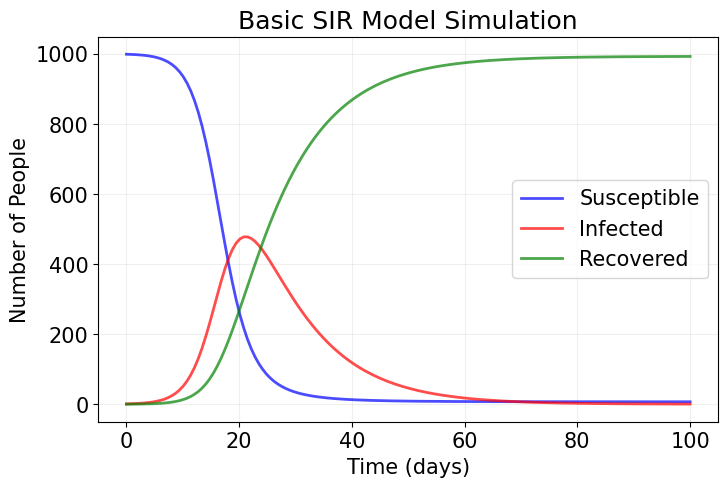

In [120]:
# Plot the data on three separate curves for S(t), I(t), and R(t)
plt.figure(figsize=(8, 5))

plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

plt.xlabel('Time (days)')
plt.ylabel('Number of People')
plt.title('Basic SIR Model Simulation')

plt.grid(alpha=.2)

plt.legend()
plt.show()


# (Stub) SIRS Model

The SIRS model is a simple generalizarion of the SIR model, where individuals who have recovered from the disease become susceptible again after some time. This is a more realistic representation of many diseases (like the flu, or Covid-19), where immunity is not permanent. The SIRS model can be described by the following set of ODEs:

$$
\begin{align*}
\frac{dS}{dt} &= -\beta \cdot I \cdot S + \xi \cdot R, \\
\frac{dI}{dt} &= \beta \cdot I \cdot S - \gamma \cdot I, \\
\frac{dR}{dt} &= \gamma \cdot I - \xi \cdot R,
\end{align*}
$$

where
- $\xi$ is the rate at which recovered individuals lose their immunity and become susceptible again.

You can implement and simulate the SIRS model by following the steps outlined in the previous sections. Run the simulations for longer times. Do you notice any qualitative difference between the SIR and SIRS models?



In [121]:
#differential eq update
def sirs_model(y, t, beta, gamma, xi):
    
    S, I, R = y

    ### To be implemented ###



    return dSdt, dIdt, dRdt

In [122]:
xi = .00001


#simulate the SIRS model

# Fitting SIR Model to Data

## Data Cleaning

In [123]:
def get_outbreak_mask(data: pd.DataFrame, threshold: int = 10):
    ''' Returns a mask for > N confirmed cases '''
    return data['cumulative_confirmed'] > threshold

In [124]:
data_key = 'IT_25' #Lombardy # 'US_MA_25017' #Middlesex County
df = pd.read_csv(f'https://storage.googleapis.com/covid19-open-data/v3/location/{data_key}.csv').set_index('date')

In [125]:
# Get data only after the outbreak begun
df = df[get_outbreak_mask(df)]

# Get data only for the selected dates
date_limit = '2020-08-17'
df = df[df.index <= date_limit]

# Get data only for the columns we care about
cols = ['cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'population']
df = df[cols]


removed = df['cumulative_deceased'] + df['cumulative_recovered']
infected = df['cumulative_confirmed'] - removed
susceptible = df['population']*.9 - infected - removed

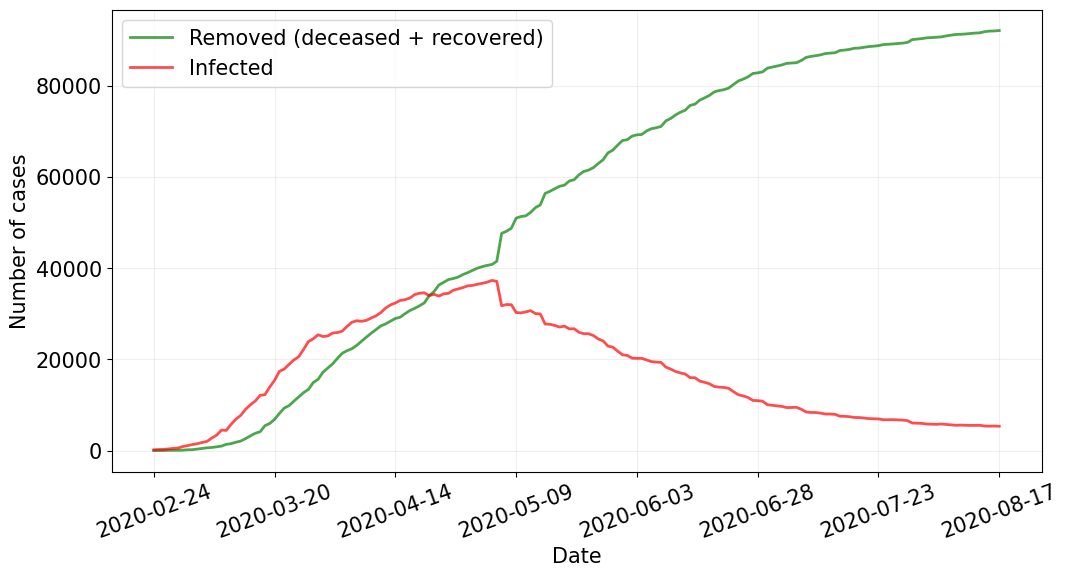

In [126]:
removed.plot(figsize=(12, 6), color='g', alpha=0.7, linewidth=2, label='Removed (deceased + recovered)')
infected.plot(figsize=(12, 6), color='r', alpha=0.7, linewidth=2, label='Infected')


#rotate x labels
plt.xticks(rotation=20)
plt.xlabel('Date')

plt.ylabel('Number of cases')
plt.grid(alpha=.2)

plt.legend();

## Fitting

In [127]:
from scipy.optimize import minimize

In [322]:
I0 = infected.iloc[0]
R0 = removed.iloc[0]
S0 = susceptible.iloc[0]

y0 = [S0, I0, R0]

print(y0)

[9054344.6, 166.0, 6.0]


In [323]:
# Time points (in days)
t = np.arange(len(infected))

# Integrate the SIR equations
def fit_odeint(t, beta, gamma):
    y = [S0, I0, R0]
    return odeint(sir_model, y, t, args=(beta, gamma))[:,1]

# Fitting the model
# Note: You might need to adjust the initial guesses and bounds
optimal = minimize(lambda params: np.mean((fit_odeint(t, params[0], params[1]) - infected)**2), 
                   [0.1, 0.00001],
                   bounds=[(0.00000001, .001), (0.0001, .1)])

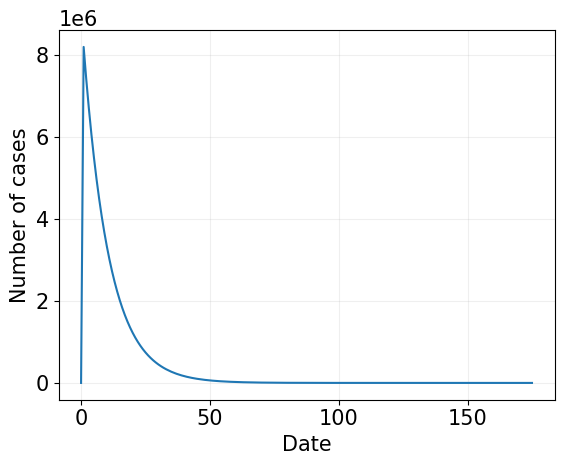

In [324]:
plt.plot(fit_odeint(t, optimal.x[0], optimal.x[1]))

plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.grid(alpha=.2)


In [325]:
optimal.x

array([0.001, 0.1  ])

**Not working!**

Qualitatively a much better fit can be achieved by using the folowing parameters (BUT WRONG ORDER OF MAGNITUDE!)

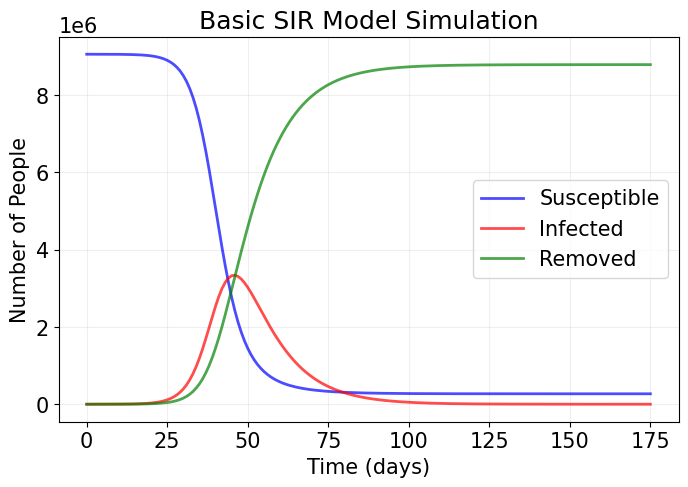

In [326]:
S, I, R = odeint(sir_model, y0, t, args=(.00000004, optimal.x[1])).T

plt.figure(figsize=(8, 5))

plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Removed')

plt.xlabel('Time (days)')
plt.ylabel('Number of People')
plt.title('Basic SIR Model Simulation')

plt.grid(alpha=.2)

plt.legend()
plt.show()